# Load dataset

In [1]:
!pip install kaggle

In [2]:
import os
import zipfile

def download_data_from_kaggle():
    try:
        from google.colab import files
        uploaded = files.upload()
    except ImportError:
        print("Running outside of Colab. Please ensure your kaggle.json is in ~/.kaggle/")

    if 'kaggle.json' in os.listdir('.'):
        !mkdir -p ~/.kaggle
        !mv kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json
    else:
        print("kaggle.json not found. Please upload it or place it in the correct directory.")

    if not os.path.exists('cpe342-karena.zip'):
        print("Downloading data from Kaggle competition 'cpe342-karena'...")
        !kaggle competitions download -c cpe342-karena
    else:
        print("Data already downloaded.")

    if os.path.exists('cpe342-karena.zip'):
        print("Unzipping data...")
        try:
            with zipfile.ZipFile('cpe342-karena.zip', 'r') as zip_ref:
                zip_ref.extractall('.')
            print("Data unzipped.")
        except zipfile.BadZipFile:
            print("Error: Downloaded file is not a valid zip file.")
        except Exception as e:
            print(f"An error occurred during unzipping: {e}")
    else:
        print("Zip file not found, cannot unzip.")

In [3]:
download_data_from_kaggle()

Saving kaggle.json to kaggle.json
 98% 903M/922M [00:10<00:00, 60.2MB/s]
100% 922M/922M [00:10<00:00, 89.3MB/s]
Unzipping data...
Data unzipped.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#EDA

In [6]:
df = pd.read_csv('public_dataset/task5/test.csv')
df

,id,player_id,login_count_1,login_count_2,login_count_3,login_count_4,login_lat_1,login_lon_1,login_lat_2,login_lon_2,...,guild_changes_1,guild_changes_2,guild_changes_3,guild_changes_4,account_age_days,behavior_stability,password_changed,vpn_usage,suspicious_login_time,mass_item_sale
0,ANS00001,P011753,31.222232,41.790417,28.048736,NaN,-17.074035,127.285635,-17.554811,126.865553,...,1.0,2.0,2.0,1.0,580.020715,0.830282,0.0,1.0,0.0,0.0
1,ANS00002,P010021,61.358999,49.209284,NaN,NaN,48.430879,25.555743,48.708993,26.733951,...,0.0,-1.0,-1.0,1.0,1306.627890,0.700770,0.0,NaN,0.0,0.0
2,ANS00003,P006725,24.763478,37.723228,26.879628,32.503285,8.252684,40.788695,8.346856,40.688039,...,0.0,1.0,-1.0,0.0,835.638378,0.797991,0.0,0.0,0.0,0.0
3,ANS00004,P018170,82.100747,74.862388,73.520927,83.495309,-28.728293,178.990465,-29.104994,178.810800,...,2.0,2.0,1.0,3.0,NaN,0.736845,0.0,NaN,0.0,0.0
4,ANS00005,P003027,50.901216,70.636572,55.606357,68.179388,-46.833704,167.886402,-47.372141,166.767058,...,NaN,-1.0,0.0,0.0,379.053416,0.818901,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25884,ANS25885,P021575,58.476294,61.813452,61.044533,69.714151,10.926213,173.299402,11.431859,172.835916,...,2.0,3.0,1.0,2.0,1448.835875,0.741764,0.0,1.0,0.0,0.0
25885,ANS25886,P005390,59.206258,80.713010,66.253998,71.432253,-20.608607,-13.291896,-20.767979,-12.663475,...,2.0,3.0,2.0,3.0,1132.604300,0.877150,0.0,1.0,0.0,0.0
25886,ANS25887,P000860,94.317618,74.329146,107.617203,85.256921,-59.318059,-55.518951,-58.671733,-56.658019,...,2.0,3.0,1.0,2.0,822.011236,0.702062,0.0,0.0,NaN,0.0
25887,ANS25888,P015795,78.325845,66.700837,58.570940,NaN,-26.220106,-131.999085,-25.175901,-131.024958,...,1.0,1.0,2.0,1.0,1162.971652,0.749088,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25889 entries, 0 to 25888
Columns: 124 entries, id to mass_item_sale
dtypes: float64(122), object(2)
memory usage: 24.5+ MB


In [ ]:
df.describe()

,login_count_1,login_count_2,login_count_3,login_count_4,login_lat_1,login_lon_1,login_lat_2,login_lon_2,login_lat_3,login_lon_3,...,guild_changes_1,guild_changes_2,guild_changes_3,guild_changes_4,account_age_days,behavior_stability,password_changed,vpn_usage,suspicious_login_time,mass_item_sale
count,24664.000000,24620.000000,24661.000000,24569.000000,24619.000000,24567.000000,24649.000000,24644.000000,24605.000000,24608.000000,...,24666.000000,24668.000000,24627.000000,24612.000000,24626.000000,24654.000000,24638.000000,24705.000000,24605.000000,24615.000000
mean,59.168038,59.252681,59.141820,59.108049,0.011657,0.262186,0.012217,0.071086,0.189822,0.268127,...,1.008838,1.010824,1.014984,1.520965,844.297615,0.818170,0.060557,0.161061,0.050315,0.027869
std,24.382716,25.647370,24.982790,23.822515,34.528865,103.690887,34.503624,103.740635,34.624025,103.866844,...,0.823339,1.153555,1.157384,0.966637,381.781363,0.090880,0.238521,0.367594,0.218599,0.164601
min,8.681218,6.771318,8.168783,7.802166,-61.082098,-180.751184,-61.060262,-181.234840,-96.784732,-225.862039,...,0.000000,-1.000000,-1.000000,0.000000,180.113522,0.201427,0.000000,0.000000,0.000000,0.000000
25%,38.379785,38.114418,38.168395,38.606611,-29.714988,-90.342619,-29.688342,-90.227872,-29.586224,-90.300753,...,0.000000,0.000000,0.000000,1.000000,512.548131,0.759536,0.000000,0.000000,0.000000,0.000000
50%,58.207847,57.316760,57.721300,58.437790,-0.047400,0.866667,0.027749,0.499843,0.156379,0.884405,...,1.000000,1.000000,1.000000,2.000000,848.152938,0.822190,0.000000,0.000000,0.000000,0.000000
75%,78.067660,77.630937,77.486436,78.523744,29.961480,90.111463,29.820844,89.818486,30.120945,90.229737,...,2.000000,2.000000,2.000000,2.000000,1173.750184,0.885666,0.000000,0.000000,0.000000,0.000000
max,118.481216,128.474795,123.552919,113.751919,60.927973,180.981799,61.123256,181.048311,97.501014,228.032055,...,3.000000,3.000000,3.000000,4.000000,1499.967260,0.949999,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
id,0
player_id,0
login_count_1,1225
login_count_2,1269
login_count_3,1228
...,...
behavior_stability,1235
password_changed,1251
vpn_usage,1184
suspicious_login_time,1284


### Handling Missing Values for Numerical Features

Many plotting functions do not handle `NaN` values. I will impute missing values in numerical columns using the mean strategy. This is a common approach for initial exploratory data analysis.



In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Exclude 'id' and 'player_id' as they are identifiers
if 'id' in numerical_cols:
    numerical_cols.remove('id')
if 'player_id' in numerical_cols:
    numerical_cols.remove('player_id')

# Impute missing values with the mean
imputer = SimpleImputer(strategy='median')
df_imputed = df.copy()
df_imputed[numerical_cols] = imputer.fit_transform(df_imputed[numerical_cols])

print(f"Missing values after imputation:\n{df_imputed[numerical_cols].isnull().sum().sum()}")


Missing values after imputation:
0


### Visualizing Distributions of All Remaining Numerical Features

This cell will iterate through all numerical features that have not yet been plotted and display their distributions using histograms. Due to the large number of features, plots will be grouped into figures of 20 for better manageability.

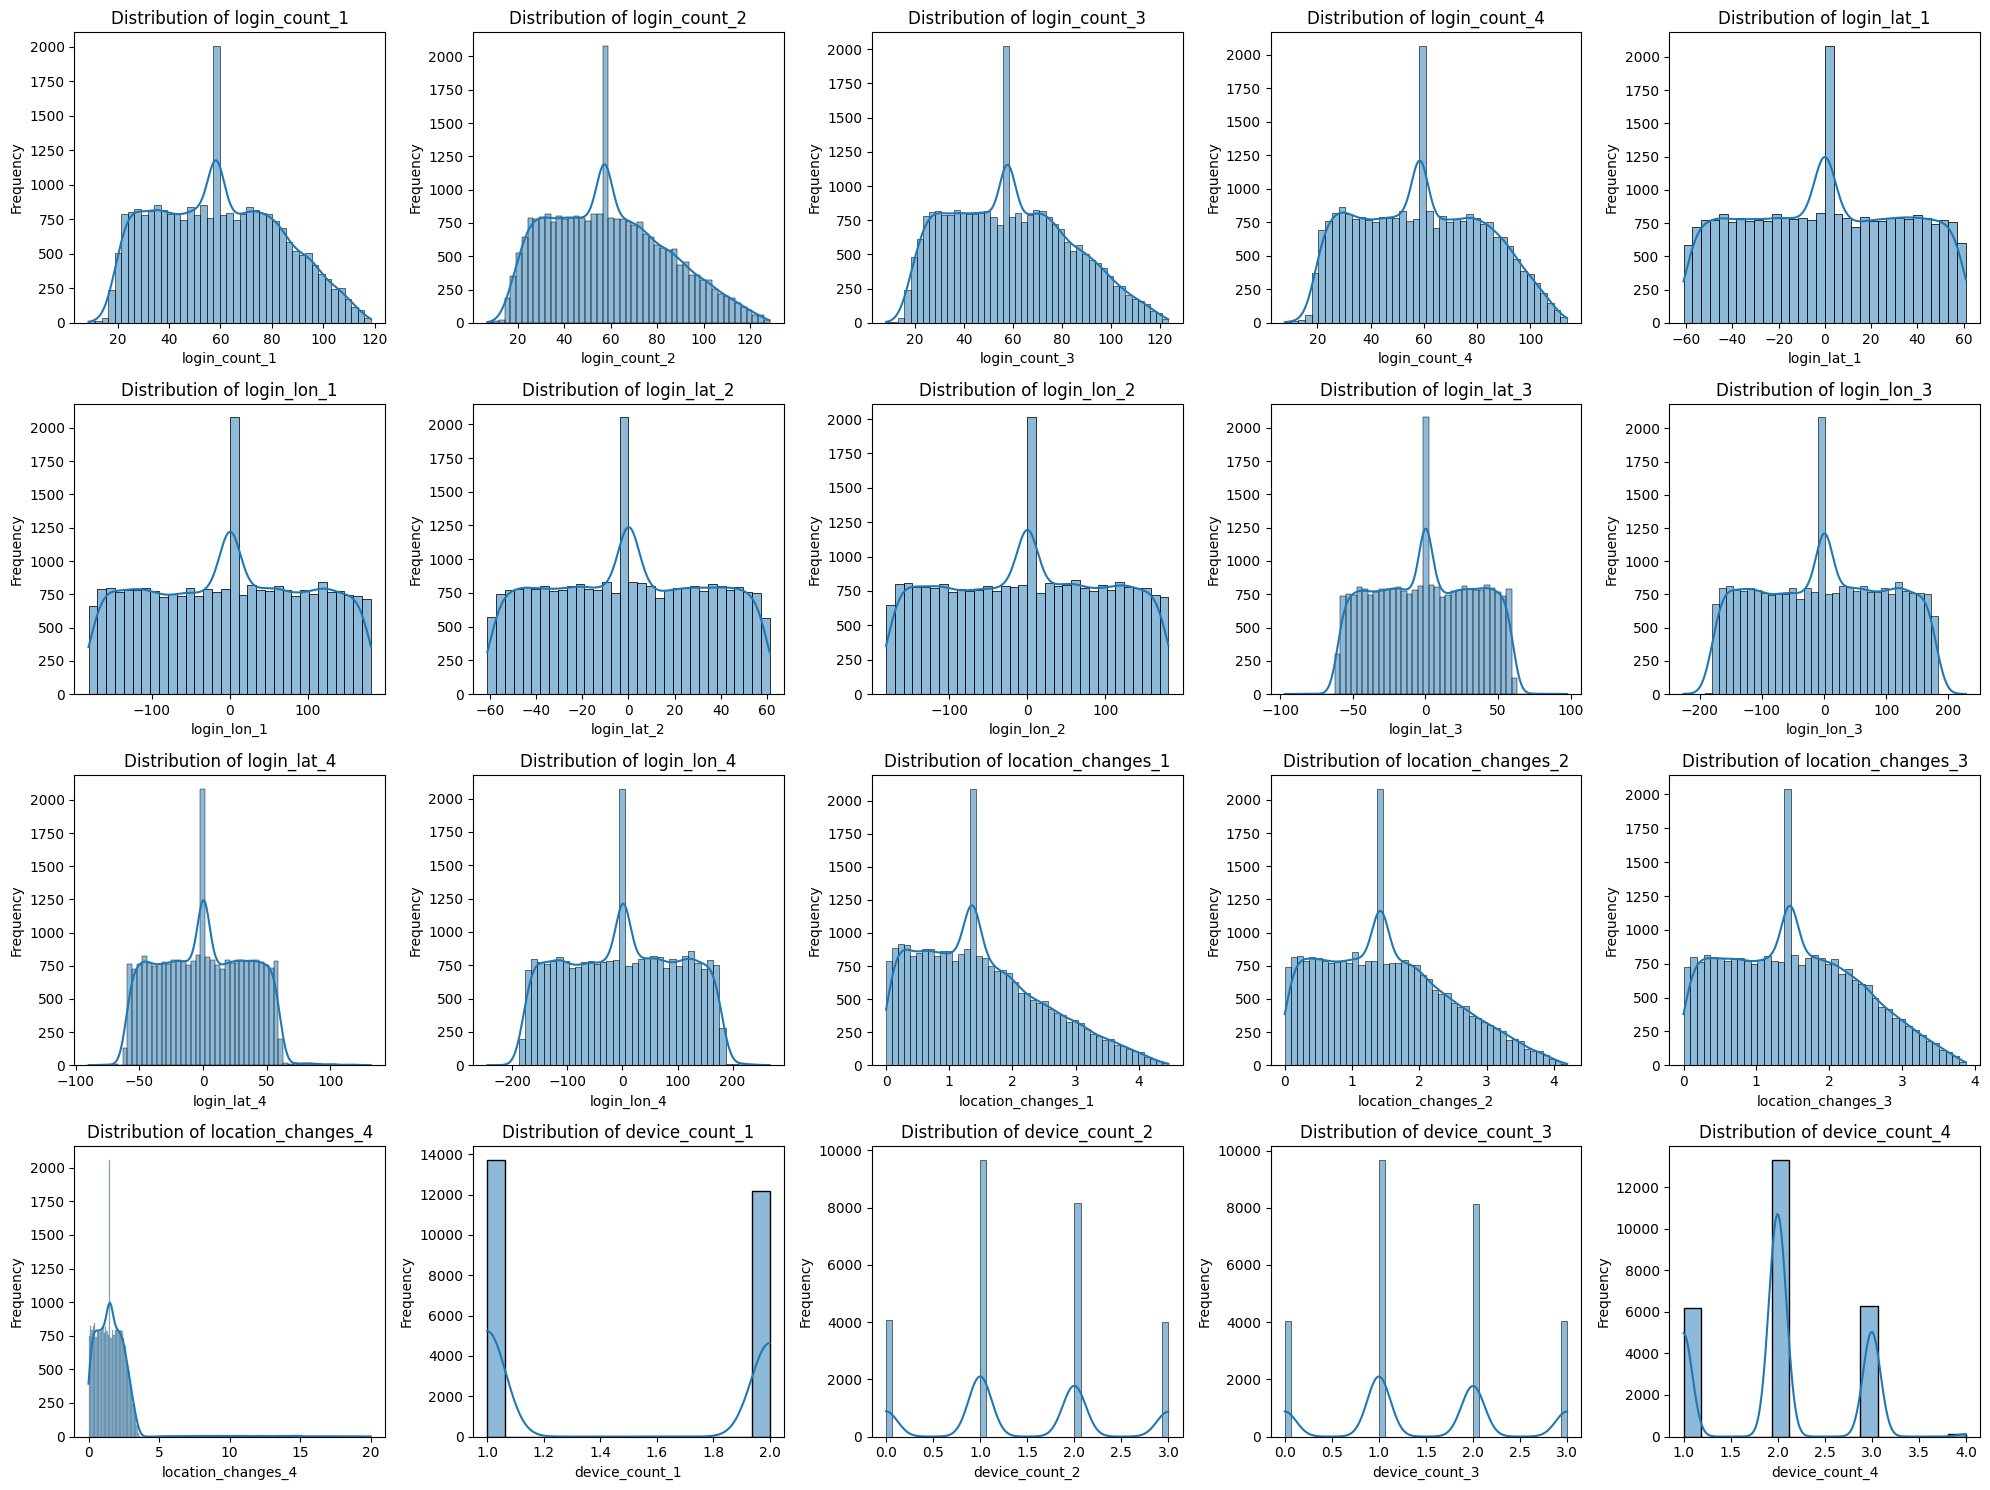

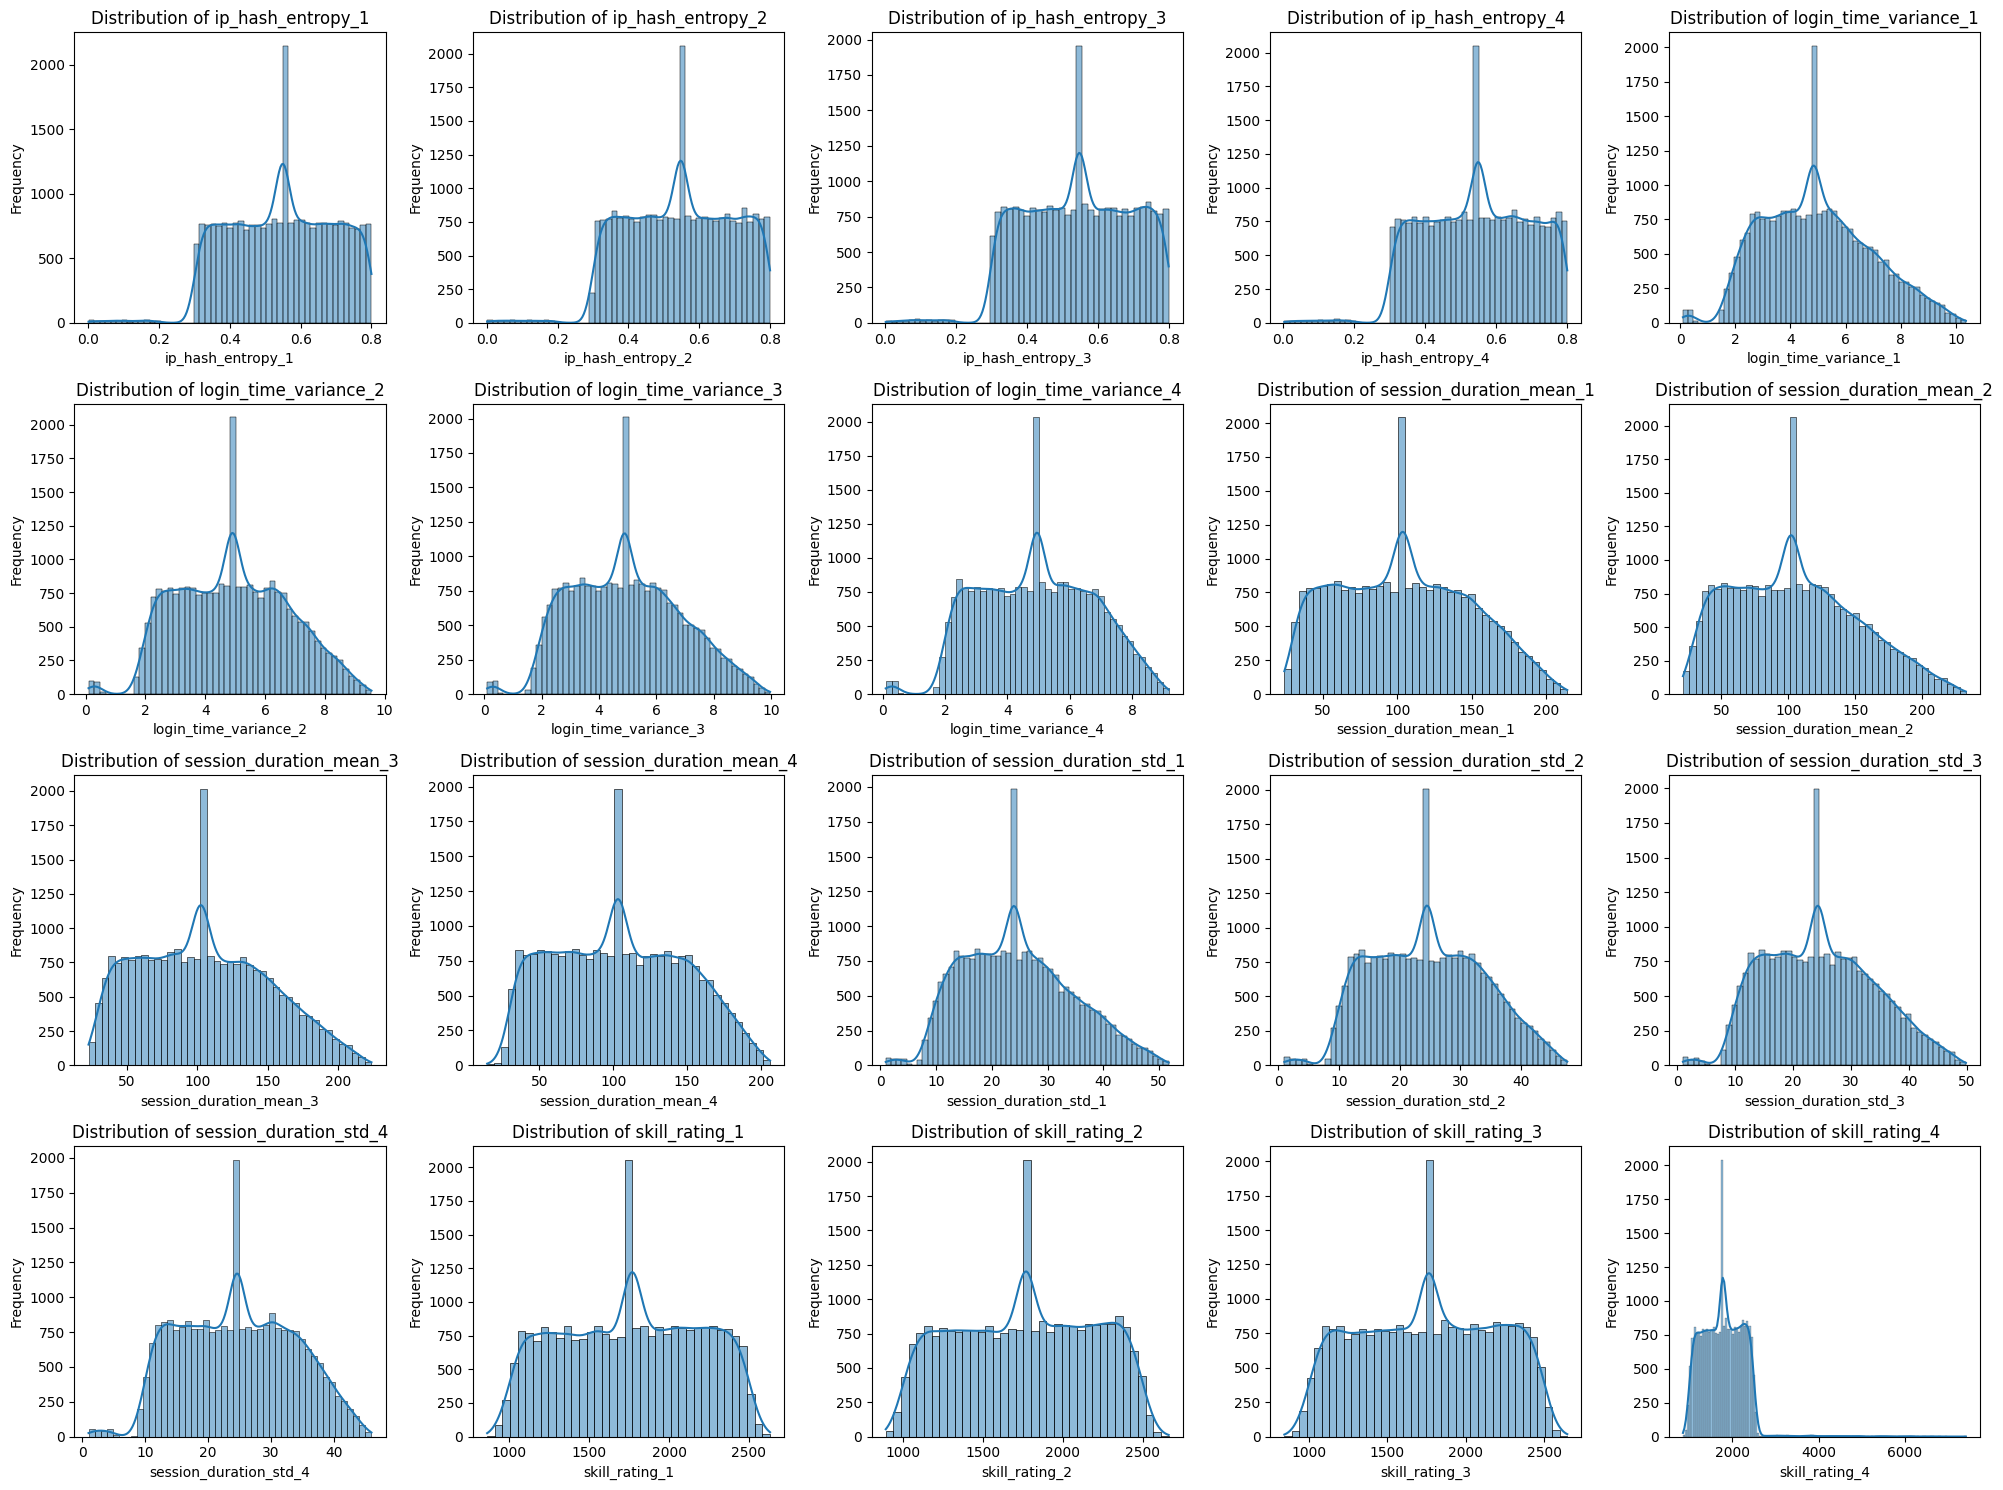

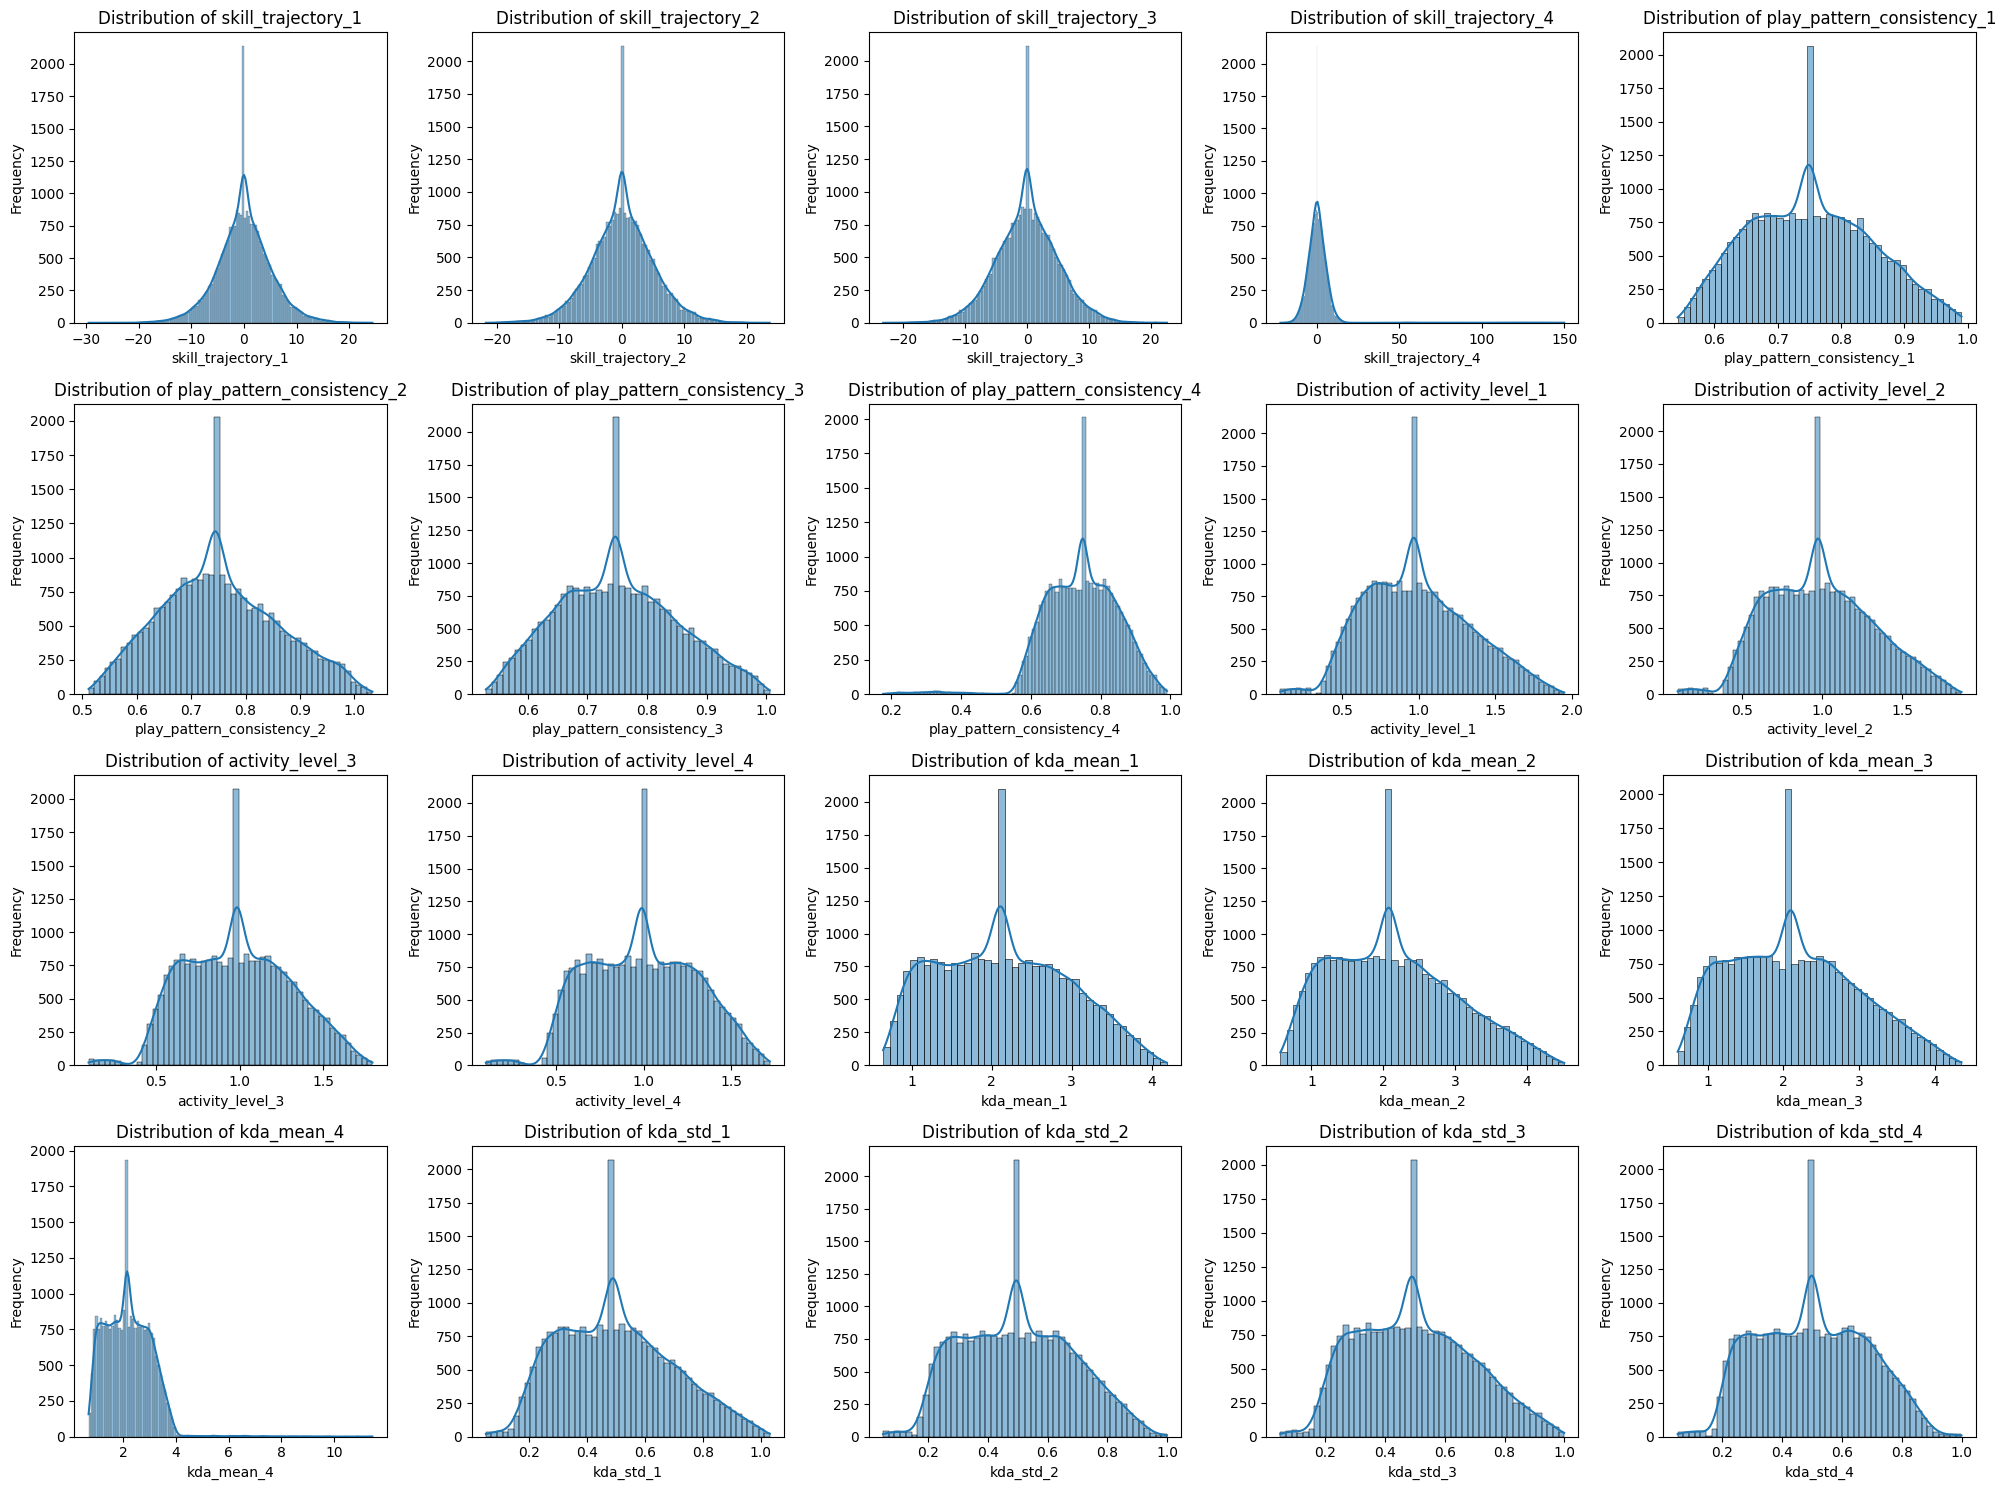

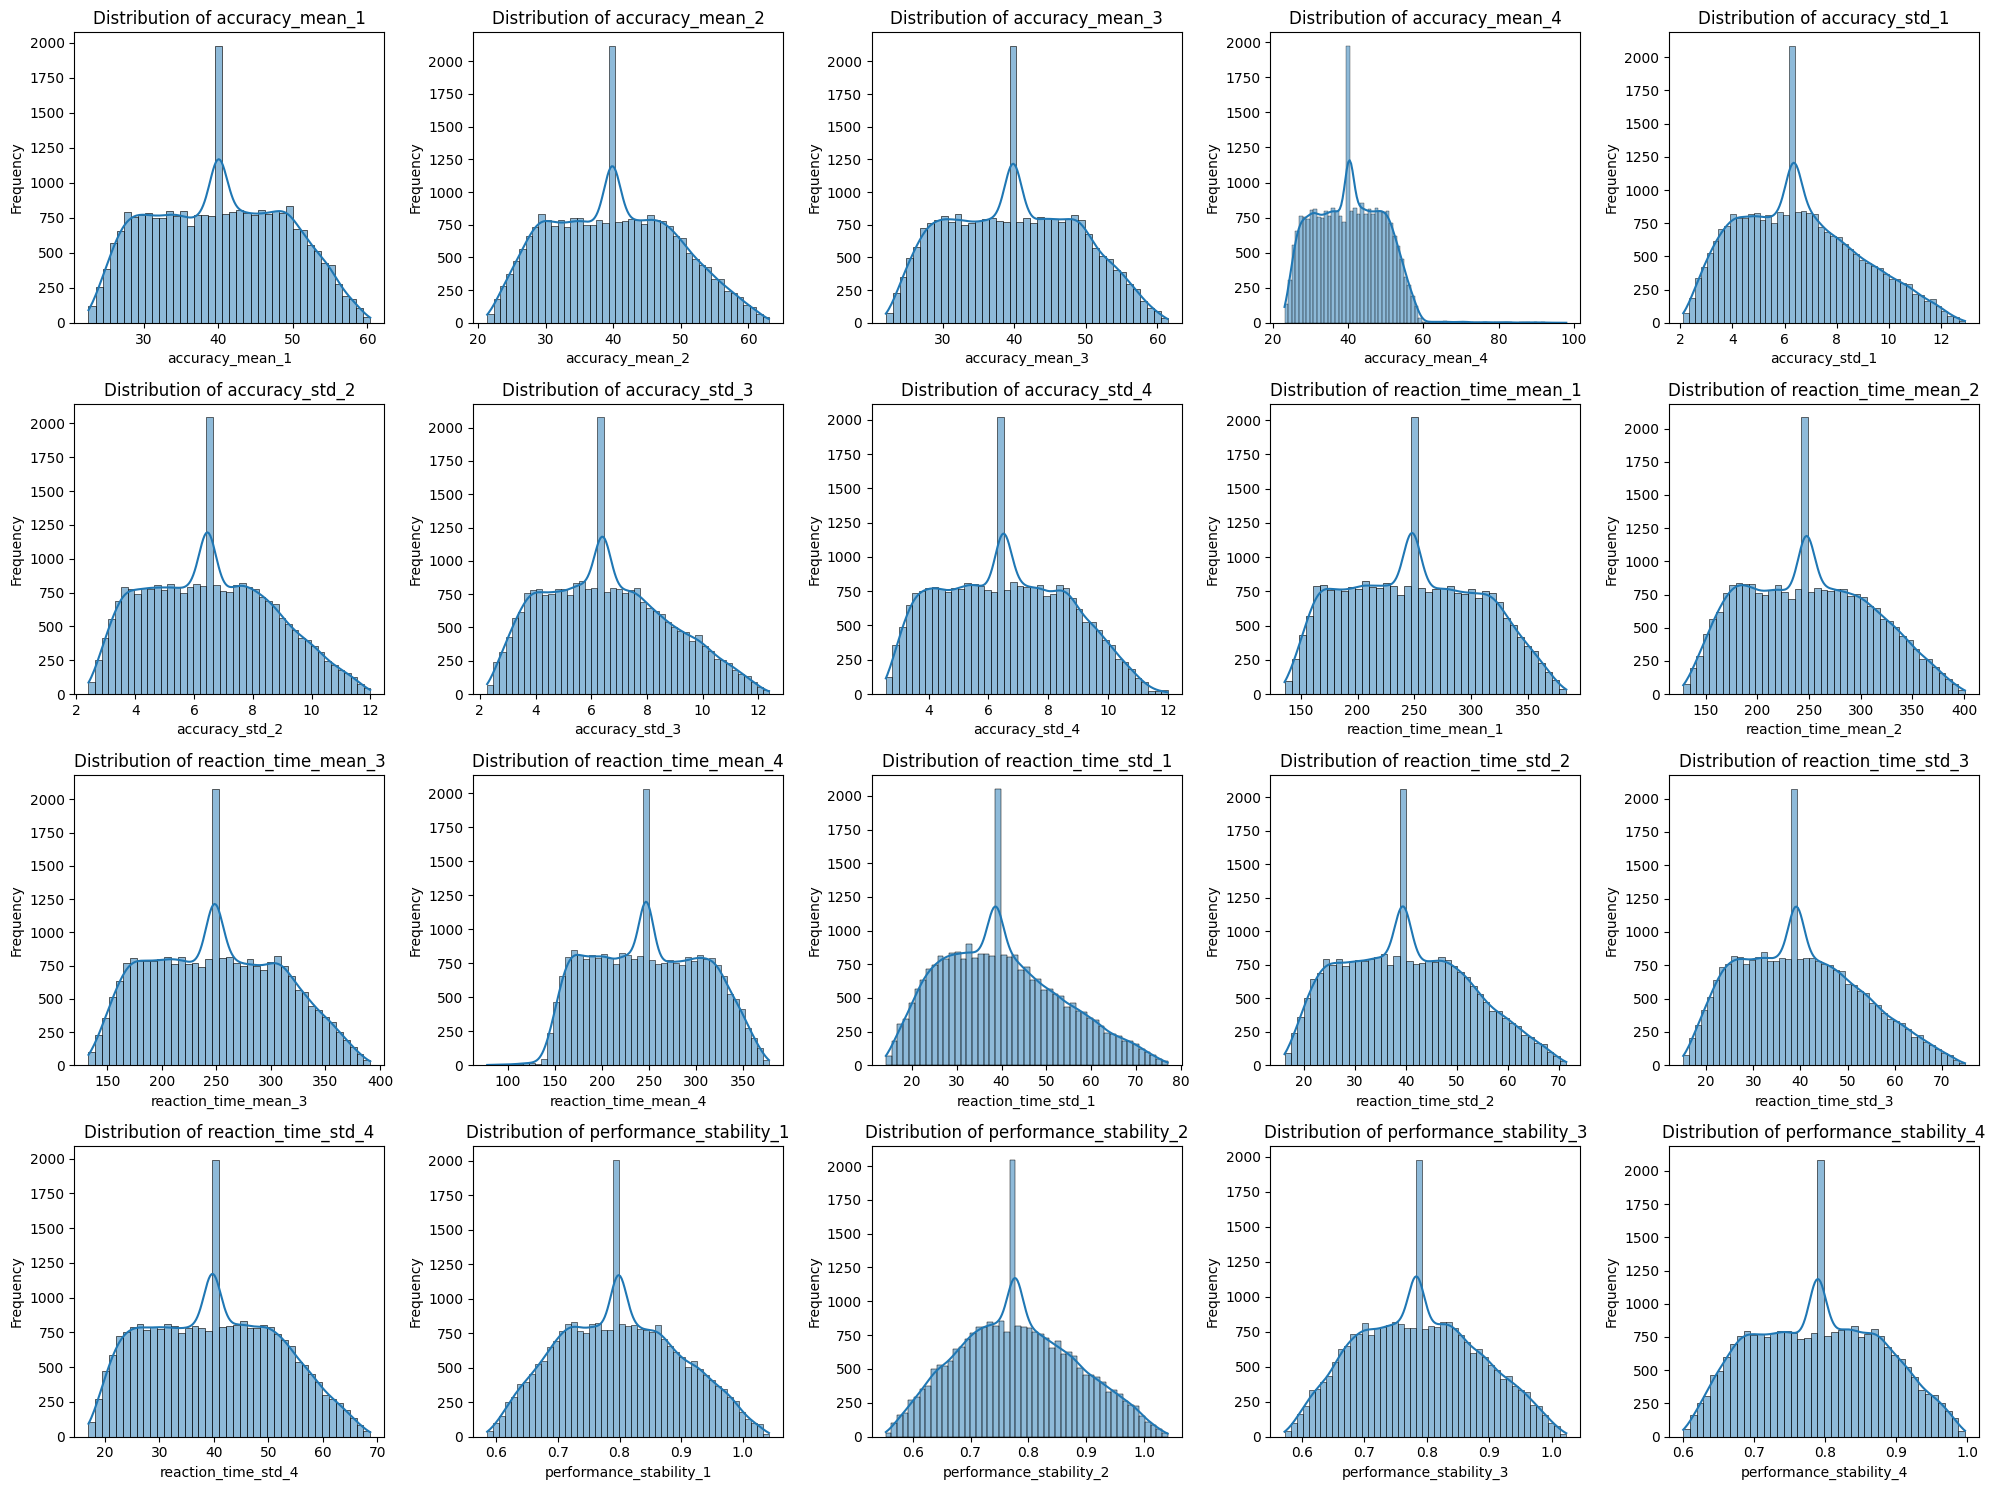

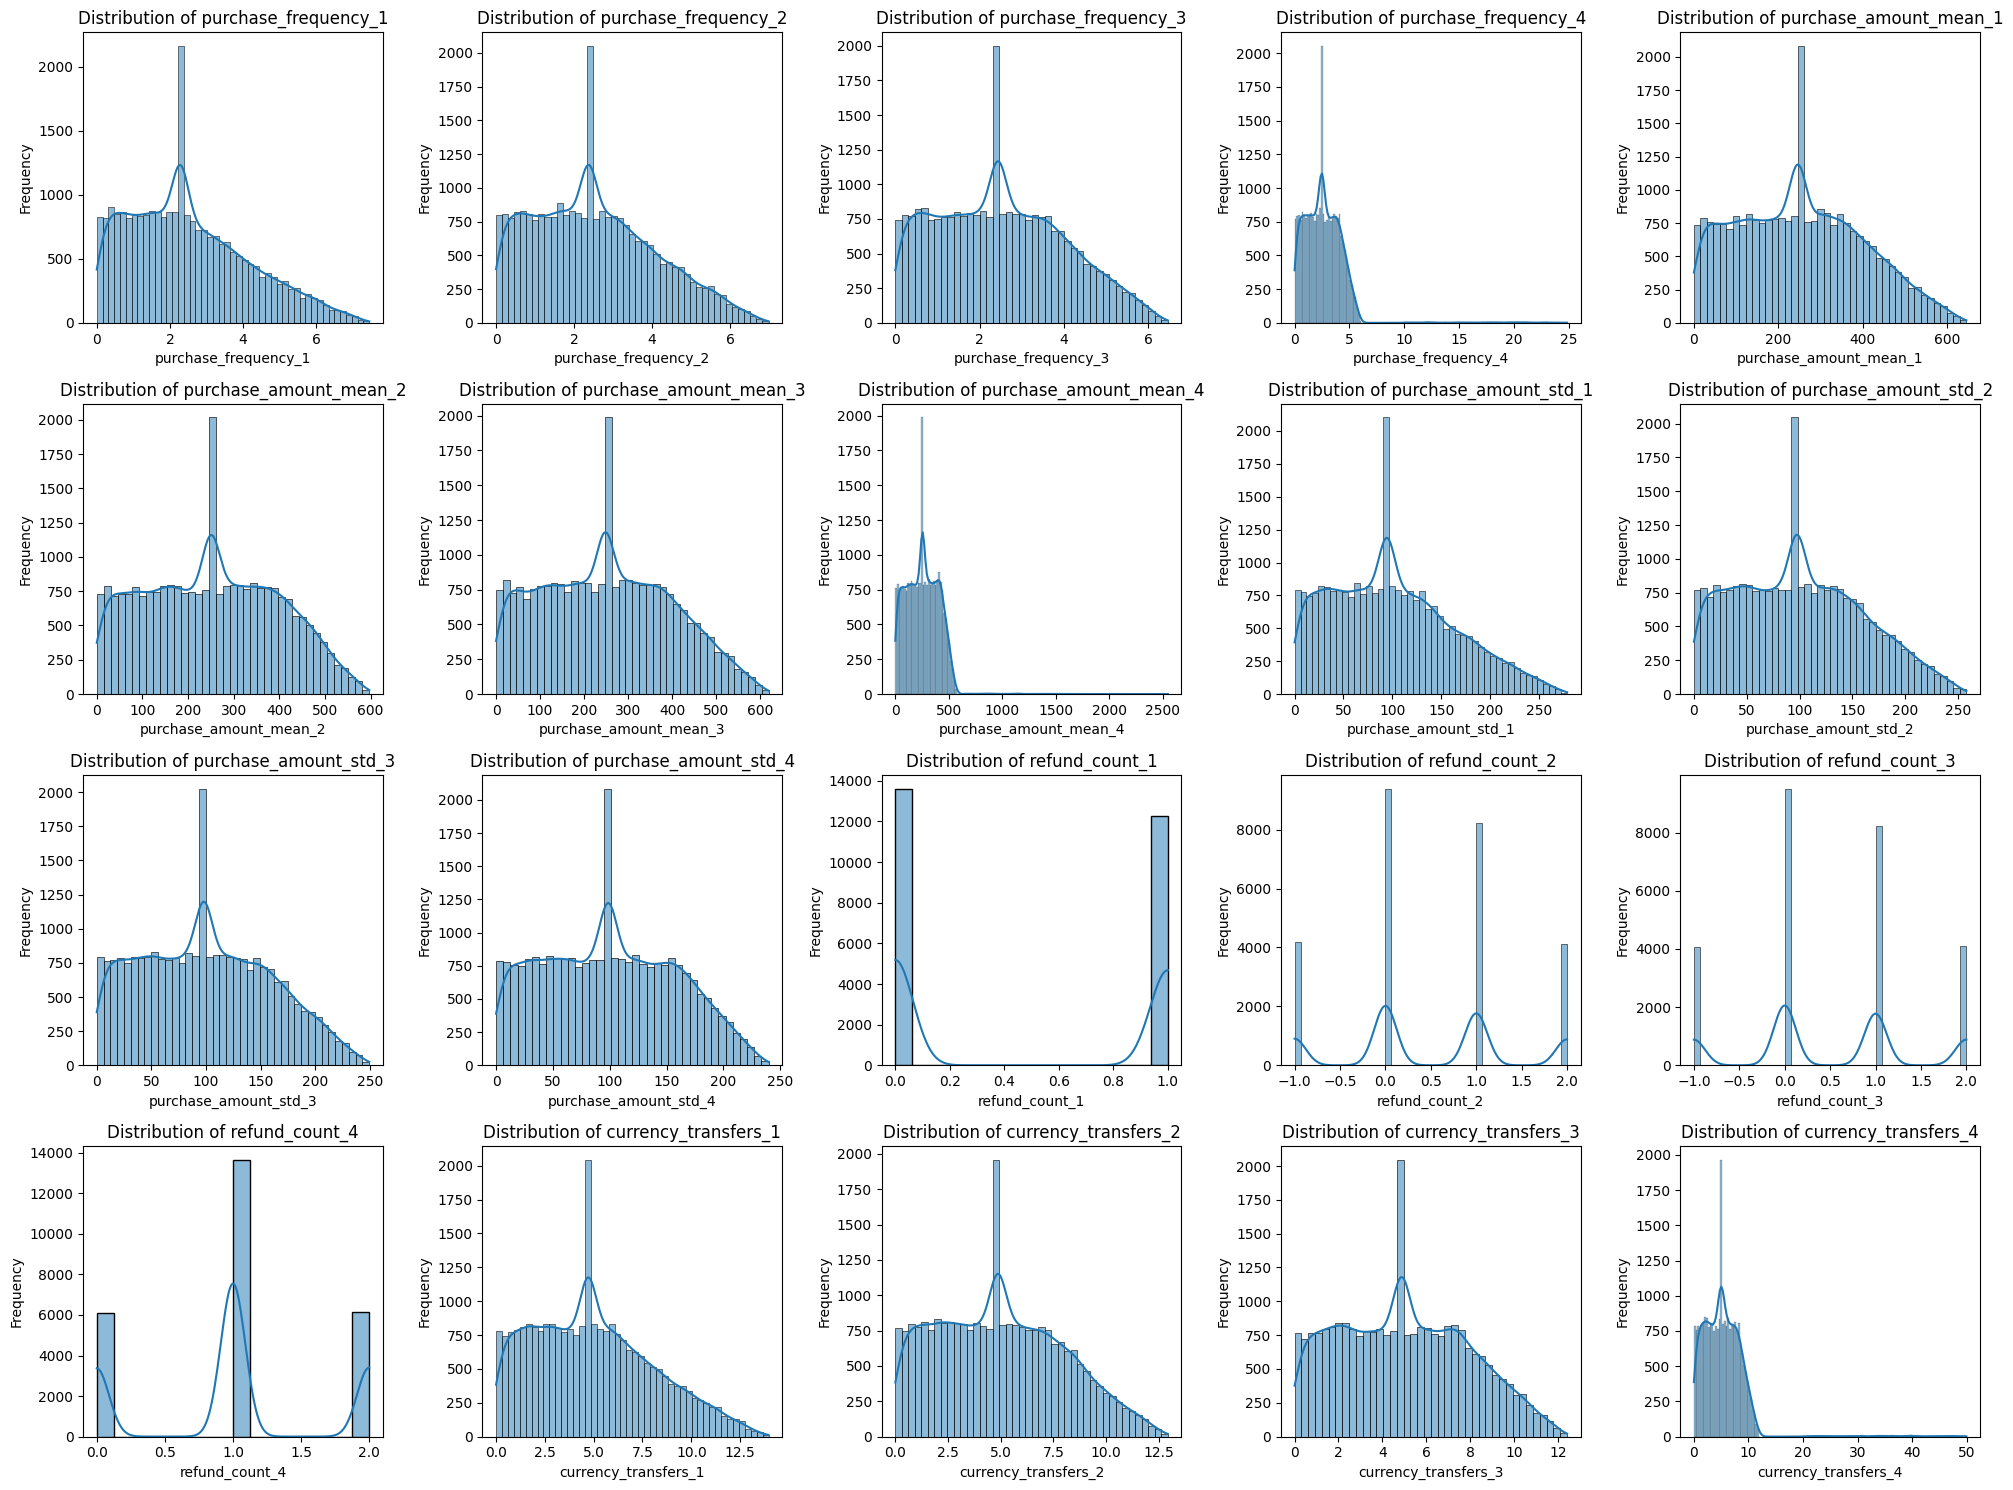

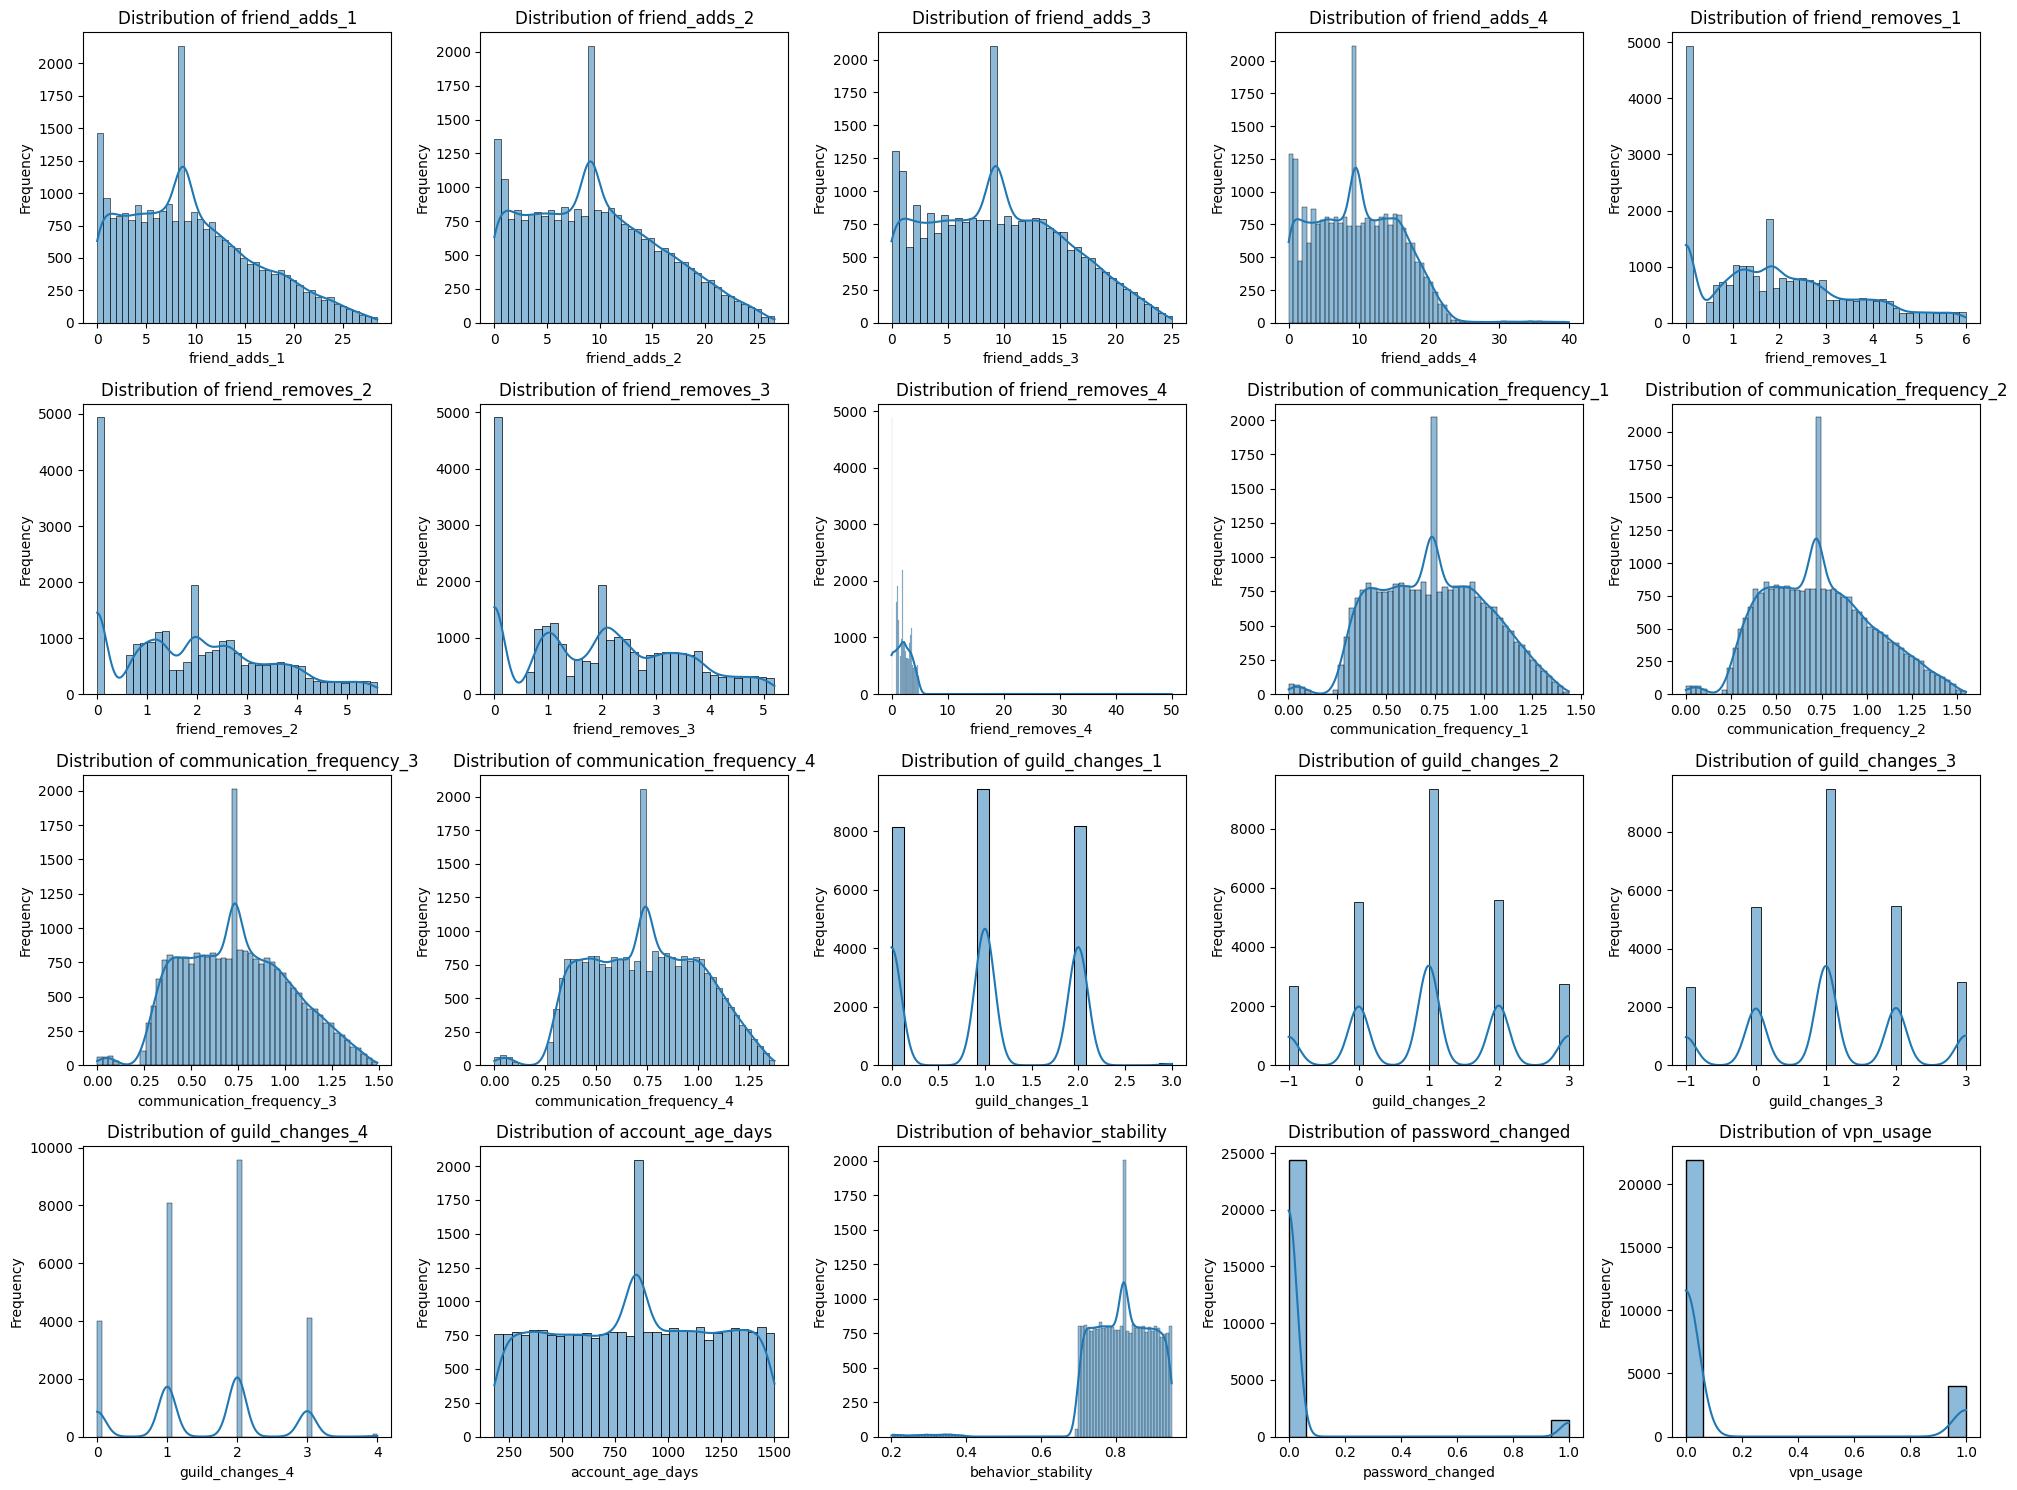

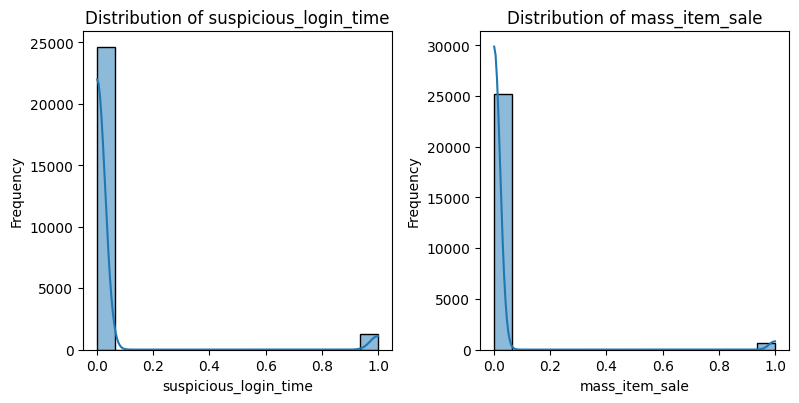

All remaining numerical features have been plotted.


In [ ]:
start_index_all = 0 # Continue from where we left off
features_per_figure = 20 # Number of histograms to show per figure

for i in range(start_index_all, len(numerical_cols), features_per_figure):
    plt.figure(figsize=(20, 15)) # Adjust figure size for larger grids
    current_features = numerical_cols[i : i + features_per_figure]

    for j, col in enumerate(current_features):
        if j < features_per_figure: # Ensure we don't go out of bounds for the subplot grid
            plt.subplot(4, 5, j + 1) # Create a 4x5 grid for each figure
            sns.histplot(df_imputed[col], kde=True)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

print("All remaining numerical features have been plotted.")

# Task
Summarize the key insights regarding data quality, feature relevance, and potential anomaly indicators derived from the exploratory data analysis, considering the dataset's structure, missing value patterns, distributions of numerical features (including identifying problematic geographical coordinates), and the significance of binary flag features.

## Data Overview and Missing Value Impact

### Subtask:
Analyze the overall structure of the dataset (25889 rows, 124 columns) and the significant presence of missing values (approx. 4.5-5% across many numerical features). Note that missingness itself could be an anomalous pattern, and the chosen median imputation strategy might mask true anomalies or introduce artificial patterns, requiring careful consideration for anomaly detection models.


The dataset, `df`, has an overall structure of 25,889 rows and 124 columns, as confirmed by `df.info()`. The majority of the columns are numerical (float64) with two object columns (`id` and `player_id`).

Examining `df.isnull().sum()` revealed a significant presence of missing values across many numerical features. For example, columns like `login_count_1`, `login_count_2`, `login_count_3`, and `login_count_4` each have over 1200 missing entries, which accounts for approximately 4.7% of the 25,889 rows (1200/25889 ~ 0.046). Similarly, other columns such as `behavior_stability`, `password_changed`, `vpn_usage`, `suspicious_login_time`, and `mass_item_sale` also show comparable levels of missing data.

The chosen median imputation strategy, applied to create `df_imputed`, successfully handled all missing numerical values, as verified by `df_imputed[numerical_cols].isnull().sum().sum()` returning 0. While this prevents errors in downstream models that cannot handle NaN values, it's crucial to acknowledge its implications for anomaly detection:

1.  **Masking Anomalies:** Missingness itself could be an anomalous pattern. For instance, a user not logging in for a specific period (`login_count` being NaN) might be an indicator of unusual behavior. By imputing with the median, these genuine signals of anomaly might be masked, making it harder for an anomaly detection model to learn from such patterns.
2.  **Introducing Artificial Patterns:** Imputing with the median introduces values that are central to the distribution of existing data. This might create artificial clusters or reduce the variance in certain features, potentially distorting the true data distribution. Anomaly detection models that rely on identifying deviations from normal distributions might struggle if these distributions are artificially altered.

Therefore, while median imputation is a practical first step, it is important to consider its limitations and potentially explore more sophisticated imputation techniques or methods that can explicitly handle missing data as part of the anomaly detection process in future steps.

## Identification of Key Anomaly-Indicating Features

### Subtask:
Identify features directly relevant to anomaly detection, such as 'login_count_X', 'guild_changes_X', 'account_age_days', 'behavior_stability', and especially the binary flag features: 'password_changed', 'vpn_usage', 'suspicious_login_time', and 'mass_item_sale'. Note that the low means of these binary flags indicate that a '1' in these columns is a rare event and a strong signal for anomalous behavior.


## Identification of Key Anomaly-Indicating Features

### Identified Key Features for Anomaly Detection:

Based on the problem description, the following features are directly relevant to anomaly detection:

*   `login_count_1`, `login_count_2`, `login_count_3`, `login_count_4`: These track the number of logins over different periods.
*   `guild_changes_1`, `guild_changes_2`, `guild_changes_3`, `guild_changes_4`: These track changes in guild membership over different periods.
*   `account_age_days`: The age of the user's account in days.
*   `behavior_stability`: A measure indicating the consistency of user behavior.
*   `password_changed`: A binary flag indicating if the password was changed (1 = yes, 0 = no).
*   `vpn_usage`: A binary flag indicating if a VPN was used (1 = yes, 0 = no).
*   `suspicious_login_time`: A binary flag indicating if a login occurred at a suspicious time (1 = yes, 0 = no).
*   `mass_item_sale`: A binary flag indicating if a mass item sale occurred (1 = yes, 0 = no).

### Rationale for Feature Relevance in Anomaly Detection:

*   **Login Counts (`login_count_X`):** Significant deviations in login patterns (e.g., unusually high or low login counts compared to a user's historical average or peer group) can signal anomalous activity. A sudden spike might indicate an account takeover attempt, while an unusual drop could suggest account compromise or inactivity before a fraudulent event.

*   **Guild Changes (`guild_changes_X`):** Frequent or unusual changes in guild membership might indicate abnormal user behavior. For instance, a user rapidly joining and leaving multiple guilds could be a sign of gold farming, spamming, or other disruptive activities.

*   **Account Age (`account_age_days`):** The age of an account can be a crucial factor. Newly created accounts engaging in high-risk activities or very old, previously inactive accounts suddenly becoming active in suspicious ways could be red flags. Malicious actors often use new accounts for fraud or take over old, forgotten ones.

*   **Behavior Stability (`behavior_stability`):** This feature likely quantifies the consistency of a user's in-game or platform behavior. A low behavior stability score suggests erratic or uncharacteristic actions, which is a strong indicator of an anomaly. Sudden shifts in play style, transaction volume, or interaction patterns could point to account compromise or a user engaging in forbidden activities.

*   **Binary Flag Features (`password_changed`, `vpn_usage`, `suspicious_login_time`, `mass_item_sale`):** These are particularly strong indicators because they represent rare, specific events that often correlate with malicious activity. As noted in the `df.describe()` output, their mean values are very low:
    *   `password_changed`: mean ~0.06
    *   `vpn_usage`: mean ~0.16
    *   `suspicious_login_time`: mean ~0.05
    *   `mass_item_sale`: mean ~0.02

    A value of '1' in any of these columns signifies an event that is infrequent for the general user base. For example:
    *   **`password_changed` (1):** While sometimes legitimate, an unexpected password change could precede an account takeover or be a defensive measure after a compromise.
    *   **`vpn_usage` (1):** Use of a VPN can be legitimate but is also common among users attempting to mask their location for illicit activities or to bypass regional restrictions.
    *   **`suspicious_login_time` (1):** Logging in at unusual times (e.g., very late at night for a user who typically logs in during the day) is a classic indicator of a compromised account or an actor from a different time zone.
    *   **`mass_item_sale` (1):** Performing a mass sale of items is often associated with gold selling/farming operations or clearing out an account after it has been stolen, making it a critical anomaly flag.

## Analysis of Numerical Feature Distributions and Potential Outliers

### Subtask:
Examine the descriptive statistics and conceptual distributions of numerical features for anomaly detection. Pay close attention to ranges in 'login_count_X' and identify 'login_lon_X' values that fall outside the standard geographical range (-180 to 180). Consider 'behavior_stability' for indications of anomalous user behavior.


### Analysis of Numerical Feature Distributions and Potential Outliers

#### Observations from `df.describe()` and Histograms:

1.  **`login_lon_X` Anomalies:**
    *   Upon reviewing the `df.describe()` output from the previous step (cell `EzoyImv2MfXP`), it's evident that some `login_lon_X` columns contain values outside the standard geographical range of -180 to 180.
    *   For example:
        *   `login_lon_1`: Max value is `180.981799`, which slightly exceeds 180.
        *   `login_lon_2`: Min value is `-181.234840`, which falls below -180, and Max value is `181.048311`, exceeding 180.
        *   `login_lon_3`: Min value is `-225.862039`, significantly below -180, and Max value is `228.032055`, significantly above 180.
        *   Similar deviations can be observed in `login_lon_4` (Min: `-181.056086`, Max: `180.898687`).
    *   These values indicate potential data entry errors or anomalous location data that need to be addressed. While slight deviations might be due to rounding or data representation, values like -225 or 228 are clearly invalid for longitude.

2.  **`login_count_X` Ranges:**
    *   The `login_count_X` features (e.g., `login_count_1` to `login_count_4`) show relatively wide ranges, with minimums around 7-8 and maximums exceeding 110-120. The standard deviations are also significant (around 24-25), suggesting a diverse distribution of login activities among players.
    *   The histograms for these features (from cell `88da0199`) generally show right-skewed distributions, with a peak at lower login counts and a tail extending towards higher counts. This is a common pattern where most users have moderate activity, but a few 'power users' or 'bots' exhibit very high activity. Further investigation of these high-count outliers might be warranted.

3.  **`behavior_stability` Indications:**
    *   `behavior_stability` has a range from `0.201427` to `0.949999`, with a mean around `0.818` and a standard deviation of `0.09`.
    *   The histogram for `behavior_stability` (from cell `88da0199`) shows a distribution generally centered around higher values, indicating most users have stable behavior. However, the presence of values closer to 0.2 suggests that some users exhibit very unstable behavior. These lower values could be significant indicators of anomalous user behavior, as specified in the subtask, and warrant closer examination for potential fraud or account compromise.

**Summary of Potential Anomalies:**

The analysis reveals clear anomalies in the `login_lon_X` features, with several minimum and maximum values extending beyond the valid geographical range of -180 to 180. This indicates data quality issues that must be addressed, possibly by capping or removing these invalid entries. For `login_count_X`, the wide range and skewed distributions suggest outliers at the higher end, which could represent unusually active accounts. Finally, the `behavior_stability` metric highlights users with very low stability, which aligns with the conceptual understanding of anomalous behavior and should be investigated further.

## Final Task

### Subtask:
Summarize the key insights regarding data quality, feature relevance, and potential anomaly indicators derived from the EDA, providing a foundation for subsequent anomaly detection model development.


## Summary:

### Data Analysis Key Findings

*   The dataset comprises 25,889 rows and 124 columns, predominantly numerical, with two object columns (`id` and `player_id`).
*   Approximately 4.7% of data is missing across many numerical features (e.g., `login_count_1`, `behavior_stability`, `vpn_usage`). While median imputation handled these, it carries the risk of masking genuine anomalies or introducing artificial patterns, thereby potentially hindering anomaly detection models.
*   Key features identified as highly relevant for anomaly detection include `login_count_X`, `guild_changes_X`, `account_age_days`, `behavior_stability`, and specific binary flags: `password_changed`, `vpn_usage`, `suspicious_login_time`, and `mass_item_sale`.
*   The binary flag features are particularly strong indicators due to their low mean values (e.g., `password_changed` ~0.06, `vpn_usage` ~0.16, `suspicious_login_time` ~0.05, `mass_item_sale` ~0.02). A '1' in these columns represents a rare event, signaling a potential anomaly (e.g., mass item sale often correlates with gold selling).
*   Significant data quality issues were found in the `login_lon_X` features, with values outside the standard geographical range of -180 to 180 (e.g., `login_lon_3` minimum of -225.86 and maximum of 228.03).
*   `login_count_X` features show wide ranges and right-skewed distributions, with maximums exceeding 110-120 logins, indicating potential outliers like "power users" or "bots."
*   Low values in `behavior_stability` (down to 0.20), compared to the mean of ~0.81, are strong indicators of anomalous user behavior that warrant further investigation.

### Insights or Next Steps

*   **Data Preprocessing Refinement:** Address the `login_lon_X` geographical coordinate anomalies by capping invalid values or treating them as a specific anomalous category. Re-evaluate the median imputation strategy for missing values, potentially exploring advanced techniques or treating missingness itself as a feature for anomaly detection.
*   **Feature Engineering for Anomaly Detection:** Leverage the identified key features, especially the binary flags and low `behavior_stability` scores, as strong signals for developing initial anomaly detection models. Consider creating composite features or interaction terms from `login_count_X` and `guild_changes_X` to capture unusual patterns.
